In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

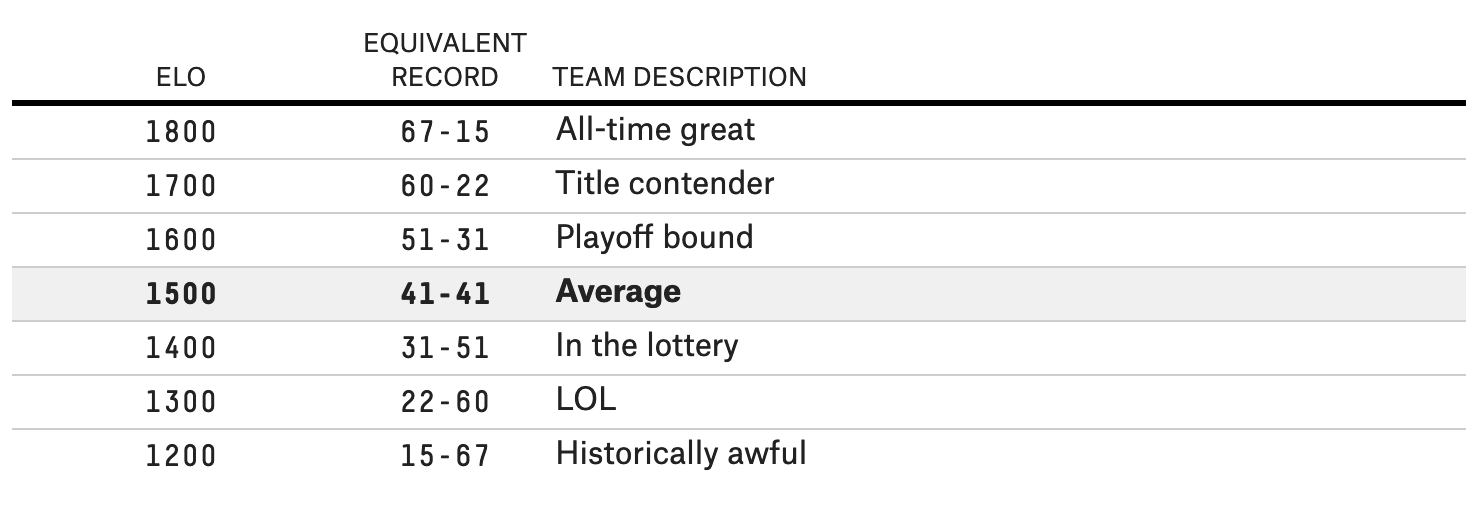

In [2]:
from IPython.display import Image
Image("img/eloTable.png")

Credit for the above image goes to FiveThirtyEight (https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/?fbclid=IwAR08nfRrzwBOP5yNaxZe4qdc0C4kPl3Tb7v0XXLoVQ6B5f43ajgNJbzU6PU). It shows the approximate benchmarks for various ELO ratings. The table conveys the idea that teams whose ELO ratings differ by just 100 points can have noticeably different win records.

In [3]:
eloDf = pd.read_csv('nbaallelo.csv')

In [4]:
eloDf.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


Championship data was taken courtesy of Basketball Reference: https://www.basketball-reference.com/playoffs/

In [5]:
championshipDf = pd.read_excel('championship.xlsx', header=[1])

In [6]:
championshipDf.head()

,Year,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
0,2018,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
1,2017,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
2,2016,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
3,2015,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
4,2014,NBA,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)


In [7]:
championshipDf.drop(columns=['Lg', 'Runner-Up', 'Finals MVP', 'Points', 'Rebounds', 'Assists', 'Win Shares'])

,Year,Champion
0,2018,Golden State Warriors
1,2017,Golden State Warriors
2,2016,Cleveland Cavaliers
3,2015,Golden State Warriors
4,2014,San Antonio Spurs
5,2013,Miami Heat
6,2012,Miami Heat
7,2011,Dallas Mavericks
8,2010,Los Angeles Lakers
9,2009,Los Angeles Lakers


In [8]:
uniqueTeams = eloDf.team_id.unique()
print(uniqueTeams)
print(uniqueTeams.size)

['TRH' 'NYK' 'CHS' 'DTF' 'WSC' 'BOS' 'PRO' 'PIT' 'STB' 'CLR' 'PHW' 'BLB'
 'INJ' 'FTW' 'MNL' 'ROC' 'TRI' 'DNN' 'INO' 'SHE' 'WAT' 'AND' 'SYR' 'MLH'
 'STL' 'DET' 'CIN' 'LAL' 'CHP' 'CHZ' 'SFW' 'BAL' 'PHI' 'CHI' 'SEA' 'OAK'
 'ANA' 'SDR' 'KEN' 'INA' 'DNR' 'DLC' 'HSM' 'NOB' 'MNM' 'NJA' 'PTP' 'ATL'
 'MIL' 'PHO' 'NYA' 'MMF' 'MNP' 'LAS' 'CAR' 'WSA' 'BUF' 'CLE' 'UTS' 'FLO'
 'PTC' 'POR' 'VIR' 'TEX' 'MMP' 'HOU' 'GSW' 'KCO' 'MMT' 'SDA' 'CAP' 'SAA'
 'NOJ' 'DNA' 'SSL' 'MMS' 'WSB' 'KCK' 'SDS' 'IND' 'NYN' 'DEN' 'SAS' 'NJN'
 'SDC' 'UTA' 'DAL' 'LAC' 'SAC' 'CHH' 'MIA' 'MIN' 'ORL' 'VAN' 'TOR' 'WAS'
 'MEM' 'NOH' 'CHA' 'NOK' 'OKC' 'BRK' 'NOP' 'CHO']
104


In [9]:
# Drop teams that haven't played at least 15 NBA seasons
for team in uniqueTeams:
    yearsPlayed = eloDf.loc[eloDf['team_id'] == team].year_id.unique().size
    if yearsPlayed < 15:
        eloDf.drop(eloDf[eloDf.team_id == team].index, inplace=True)

uniqueTeams = eloDf.team_id.unique()
uniqueTeams.size

30

In [10]:
def plotElo(teams, colors=None):
    ''' 
    Creates a line plot displaying the ELO trends of the specified NBA teams
    
    :param teams: An array of strings, each string representing a team name
                  i.e. ['GSW', 'LAL']
    :param colors: An array of strings, each string representing the color
                   associated with a team
                   i.e. ['orange', 'purple']
    '''

    allTeamDataFrames = []
    # Extract ELO data from each team
    for team in teams:
        team = eloDf.loc[eloDf['team_id'] == team]
        activeYears = team.year_id.unique()
        eloData = []
        # Get mean ELO of each year for the current team
        for year in activeYears:
            meanEloThisYear = team.loc[eloDf['year_id'] == year].elo_n.mean()
            eloData.append(meanEloThisYear)
        currDf = pd.DataFrame(eloData, columns=['meanElo'], index=activeYears)
        allTeamDataFrames.append(currDf)
    df = pd.concat(allTeamDataFrames, ignore_index=True, axis=1)
    df.columns = teams

    stringifiedTeam = ', '.join(teams )
    if colors == None:
        df.plot(kind='line', title='ELO for ' + stringifiedTeam + ' over time')  
    else:
        df.plot(kind='line', title='ELO for ' + stringifiedTeam + ' over time', color=colors)

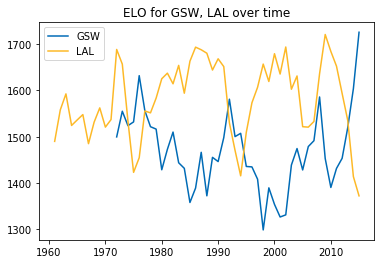

In [11]:
plotElo(['GSW', 'LAL'], ['#006BB6', '#FDB927'])

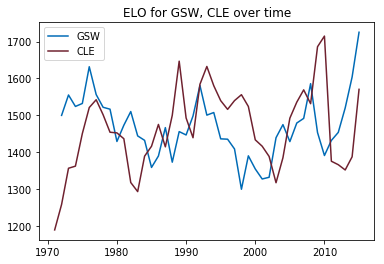

In [12]:
plotElo(['GSW', 'CLE'], ['#006BB6', '#6f212f'])

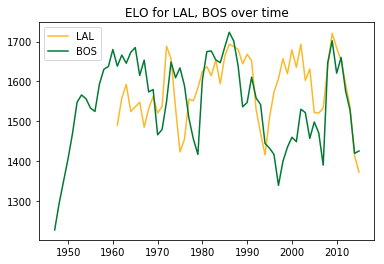

In [13]:
plotElo(['LAL', 'BOS'], ['#FDB927', '#007A33'])

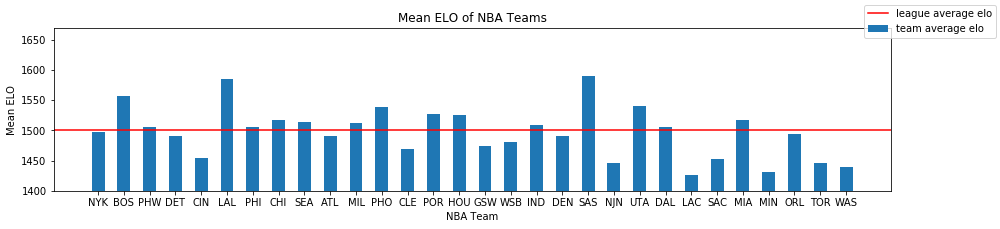

In [14]:
# Calculate the mean ELO of each NBA team over all years it has been active
meanTeamEloRatings = []
for team in uniqueTeams:
    meanTeamEloRatings.append(eloDf.loc[eloDf['team_id'] == team].elo_n.mean())

ax = plt.figure(figsize=(15, 3))
plt.bar(uniqueTeams, meanTeamEloRatings, width=0.5, label='team average elo')
plt.xlabel('NBA Team')
plt.ylabel('Mean ELO')
plt.title('Mean ELO of NBA Teams')
plt.axhline(y=1500, color='r', linestyle='-', label='league average elo')
ax.legend()

# Set ymin to 1400 to more clearly show differences in mean ELO between various teams
plt.ylim(bottom=1400) 
plt.show()

When we calculate the mean ELO of NBA teams over all the years they have been active, we see that certain teams, most noticeably the Boston Celtics (BOS), Los Angeles Lakers (LAL), and San Antonio Spurs (SAS), stand out in terms of having higher mean ELO. Hence, compared to the rest of the league, the Celtics, Lakers, and Spurs have as a whole won a large percentage of their games, which contributes to them being seen as some of the more successful NBA teams in the long run. The Golden State Warriors (GSW), despite being one of the most dominant teams today, has historically been relatively weak, achieving a below average win percentage. 


In [15]:
# Plot data for ELO of all teams over time
# for team in uniqueTeams:
#     teamData = eloDf.loc[eloDf['team_id'] == team]
#     activeYears = teamData.year_id.unique()

#     data = []
#     for year in activeYears:
#         meanEloThisYear = teamData.loc[eloDf['year_id'] == year].elo_n.mean()
#         data.append(meanEloThisYear)

#     df = pd.DataFrame(data, columns=['meanElo'], index=activeYears)

#     plt.plot(df)
#     plt.title('ELO For %s' % team)
#     plt.xlabel('Year')

#     plt.ylabel('ELO Rating')
#     print(plt.show())

...

So what makes a team great? What makes a team so bad that their ELO rating is considered "historically awful" by FiveThirtyEight? There are numerous factors that can be considered here, and we will primarily focus on the quality of the players. That is, we want to see how much the players' skill (e.g. level of experience, PER) and other stats (e.g. height, weight, age) contribute the their teams' ELO. 

First, we will import the dataset of players, which was provided by [Fernando Blanco on Kaggle](https://www.kaggle.com/whitefero/nba-players-advanced-season-stats-19782016/version/4). 

In [16]:
playersDf = pd.read_excel('playerStats.xlsx')

In [17]:
playersDf.head()

,year,tm,player,age,g,mp,per,ts,3par,ftr,...,d_worp,adjusted_worp,estimated_position,bbref_pos,age_on_feb_1,yrs_experience,height,weight,rounded_position,rounded_age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,...,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,...,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,...,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,...,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,...,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0


Now, we have to clean the data. The dataset has a total of 109 columns, many of which are repetitive, so we will only include the columns that are most relevant to our analysis. 


In [18]:
playersDf = playersDf.loc[:, playersDf.columns.isin(['year', 'tm', 'player', 'age', 
                                                     'g', 'mp', 'per', 'yrs_experience', 
                                                     'height', 'weight', 'age'])]
playersDf = playersDf.dropna() # Drop all rows that have NaN values
playersDf.head()

,year,tm,player,age,g,mp,per,yrs_experience,height,weight
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,3.0,79.0,225.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,6.0,75.0,180.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,9.0,81.0,235.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,7.0,81.0,230.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,5.0,81.0,210.0


In [19]:
bestTeam = playersDf.loc[playersDf['tm'] == 'CHI'].loc[playersDf['year'] == 1997]
bestTeam.head()

,year,tm,player,age,g,mp,per,yrs_experience,height,weight
7219,1997,CHI,Michael Jordan,33,82,3106,27.8,11.0,78.0,195.0
7220,1997,CHI,Scottie Pippen,31,82,3095,21.3,9.0,80.0,210.0
7327,1997,CHI,Dennis Rodman,35,55,1947,13.9,10.0,79.0,210.0
7342,1997,CHI,Steve Kerr,31,82,1861,15.6,8.0,75.0,175.0
7357,1997,CHI,Ron Harper,33,76,1740,13.6,10.0,78.0,185.0


In [20]:
mj = playersDf.loc[playersDf['player'] == 'Michael Jordan']
mj.head()

,year,tm,player,age,g,mp,per,yrs_experience,height,weight
2330,1985,CHI,Michael Jordan,21,82,3144,25.8,0.0,78.0,195.0
2926,1986,CHI,Michael Jordan,22,18,451,27.5,1.0,78.0,195.0
3024,1987,CHI,Michael Jordan,23,82,3281,29.8,2.0,78.0,195.0
3381,1988,CHI,Michael Jordan,24,82,3311,31.7,3.0,78.0,195.0
3761,1989,CHI,Michael Jordan,25,81,3255,31.1,4.0,78.0,195.0
